In [6]:
#Import statements
import pandas as pd
import geopy
import geopy.geocoders
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import gmaps
import matplotlib.pyplot as plt
import pymannkendall as mk
from scipy.stats import sem
import math
from IPython import display

In [2]:
#import dataset
df = pd.read_csv('Transit_System_Time_Series.csv',low_memory = False)
df.tail()

,5 digit NTD ID,4 digit NTD ID,Agency,Reporter Type,Subrecipient Type,Organization Type,Agency Total Fleet Vehicles,Primary UZA Code,Primary UZA Name,Primary UZA Area SQ Miles,...,Long-Term Debt (2210),Noncurrent Accounts Payable (2220),Capital Lease Obligations (2230),Long-Term Pension Liabilities (2240),Estimated Liabilities (2250),Other Noncurrent Liabilities (2290),Total Noncurrent Liabilities,Total Liabilities (2000),Deferred Outflows Of Resources (3100),Net Position (3000)
16478,A0020-55643,NaN,"Marielders, Inc.",Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16479,A0020-55646,NaN,Maple Knoll Communities,Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16480,A0020-55647,NaN,Clermont County Board of Developmental Disabil...,Reduced Asset Reporter,Asset Subrecipient,Private-Non-Profit Corporation,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16481,A0021,NaN,City of Tucson,Group Plan Sponsor,NaN,"City, County or Local Government Unit or Depar...",0,52.0,"Tucson, AZ",353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16482,A0022,NaN,San Luis Obispo Regional Transit Authority,Group Plan Sponsor,NaN,Independent Public Agency or Authority of Tran...,0,447.0,"San Luis Obispo, CA",20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Heatmap

#Data Cleaning
citydf = df[['Primary UZA Name']].dropna()
citydf = citydf.drop_duplicates()
citydf.columns = ['Primary UZA Name']

#Converting the city names into coordinates
locator = Nominatim(user_agent = "myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
location = []
for city in citydf['Primary UZA Name']:
    l = locator.geocode(city)
    if(l != None):
        location.append(l)
locationdf = pd.DataFrame(location)
locationdf.columns = ['location','coordinates']
print('0')

0


In [5]:
#Plot the coordinates on a map
api_key = "" #Insert your Google API key here
gmaps.configure(api_key=api_key)
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locationdf['coordinates']))
fig


Figure(layout=FigureLayout(height='420px'))

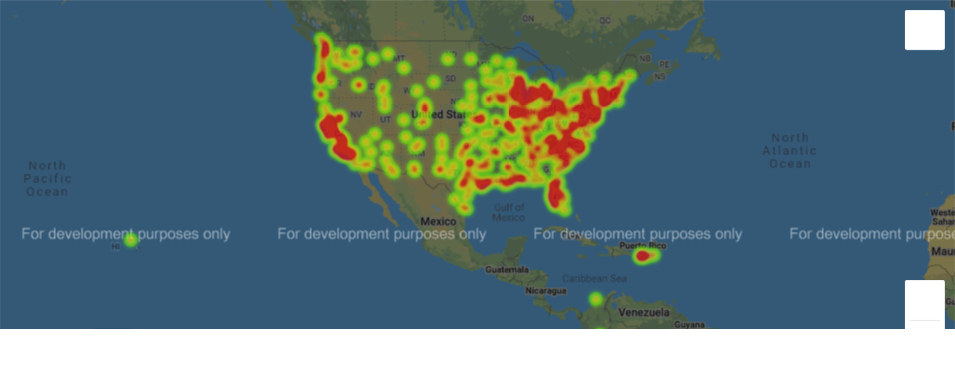

In [9]:
#In case the map does not load (which it will not in HTML), two pictures have been taken of the map and are shown below
display.Image("USMap.png")

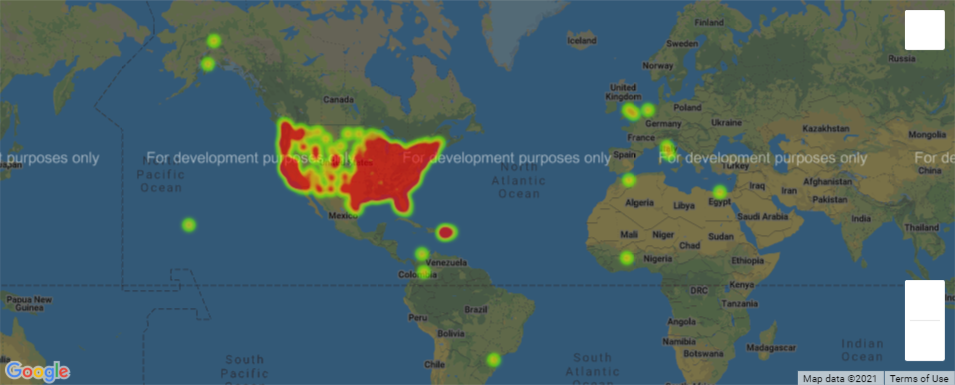

In [8]:
display.Image("worldMap.png")